In [10]:
import pandas as pd
import numpy as np
from numpy.random import standard_t
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import Image


# A

In [11]:
lfw = fetch_lfw_people(min_faces_per_person=100, resize=0.4)
lfw_data = lfw.data

unique, counts = np.unique(lfw.target, return_counts=True)
for idx, count in zip(unique, counts):
    print(f"{lfw.target_names[idx]}: {count}")

print(f"\ncount of image: {lfw.data.shape[0]}")
print(f"\ncount of pixel: {lfw.data.shape[1]}")
print(f"count of person: {len(lfw.target_names)}")

Colin Powell: 236
Donald Rumsfeld: 121
George W Bush: 530
Gerhard Schroeder: 109
Tony Blair: 144

count of image: 1140

count of pixel: 1850
count of person: 5


# B

(1140, 1850)
(1140, 1062)
100.00%


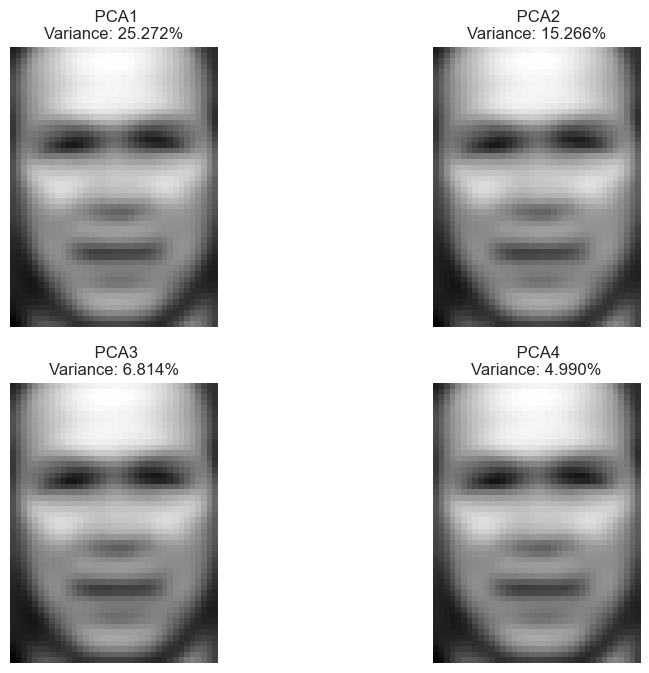

In [39]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(lfw_data)

pca = PCA(n_components=4)
# pca = PCA(n_components=1062)
x_pca = pca.fit_transform(x_scaled)

print(lfw_data.shape)
print( x_pca.shape)
print(f"{pca.explained_variance_ratio_.sum():.2%}")

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for idx, (ax, comp_idx) in enumerate(zip(axes.flat, [0, 1, 2, 3])):
    # Inverse transform for better visualization
    eigenface = scaler.inverse_transform(pca.components_[comp_idx].reshape(1, -1))
    eigenface = eigenface.reshape(h, w)

    ax.imshow(eigenface, cmap='gray')
    ax.set_title(f" PCA{idx + 1}\nVariance: {pca.explained_variance_ratio_[comp_idx]:.3%}")
    ax.axis('off')

ابعاد داده اولیه: (1140, 1850)
ابعاد پس از PCA: (1140, 150)
واریانس حفظ شده: 94.36%


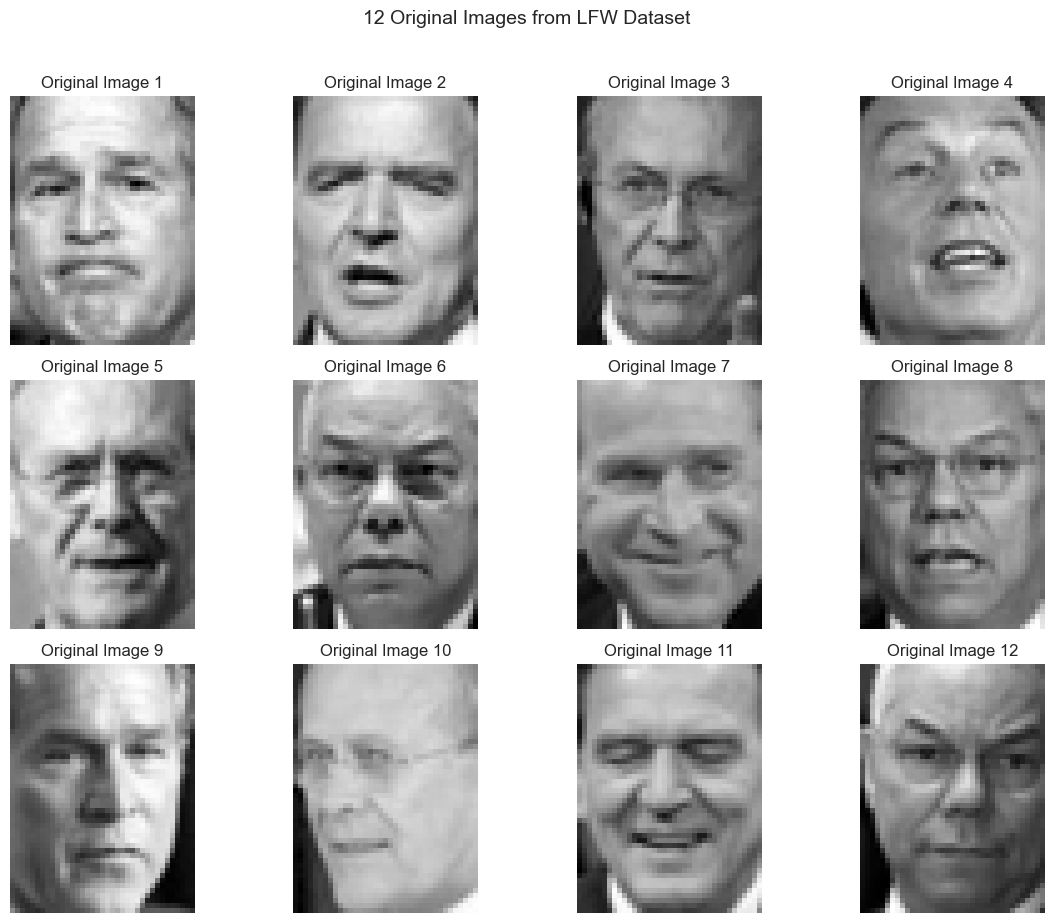

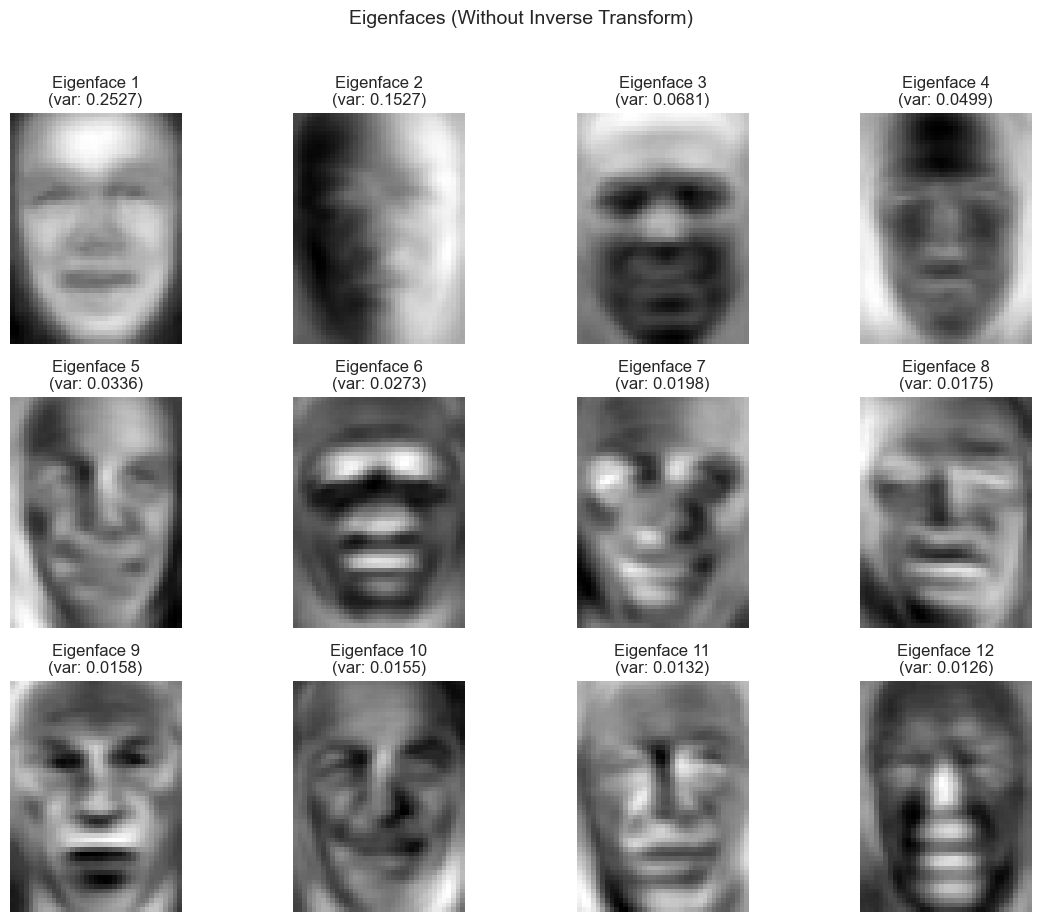

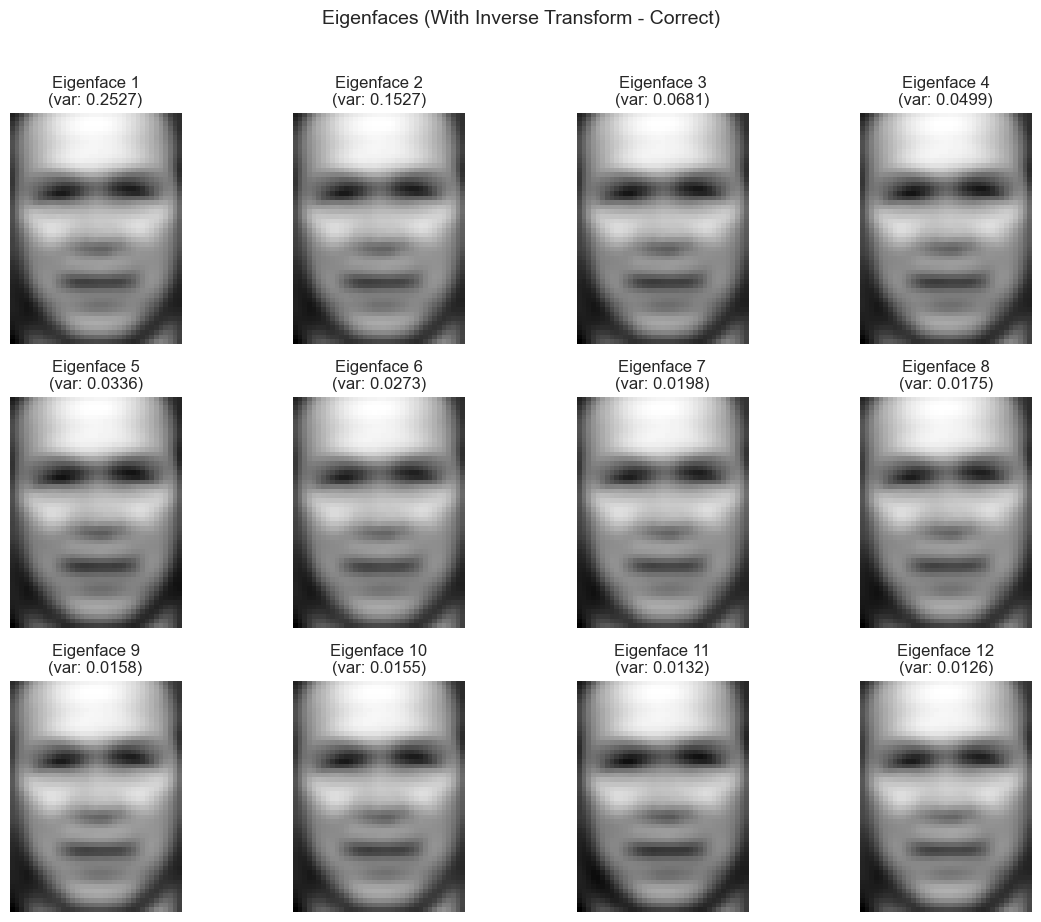

In [12]:
# fig, axes = plt.subplots(3, 4, figsize=(12, 9))
# for i, ax in enumerate(axes.flatten()):
#     ax.imshow(lfw_data[i].reshape(h, w), cmap="gray")
#     ax.set_title(f"Original Image {i + 1}")
#     ax.axis("off")
# fig.suptitle("12 Original Images from LFW Dataset", fontsize=14, y=1.02)
# plt.tight_layout()
# plt.show()
#
# fig, axes = plt.subplots(3, 4, figsize=(12, 9))
# for i, ax in enumerate(axes.flatten()):
#     eigenface_raw = pca.components_[i].reshape(h, w)
#     ax.imshow(eigenface_raw, cmap="gray")
#     ax.set_title(f"Eigenface {i + 1}\n(var: {pca.explained_variance_ratio_[i]:.4f})")
#     ax.axis("off")
# fig.suptitle("Eigenfaces (Without Inverse Transform)", fontsize=14, y=1.02)
# plt.tight_layout()
# plt.show()
#
# fig, axes = plt.subplots(3, 4, figsize=(12, 9))
# for i, ax in enumerate(axes.flatten()):
#     eigenface = scaler.inverse_transform(pca.components_[i].reshape(1, -1)).reshape(h, w)
#     ax.imshow(eigenface, cmap="gray")
#     ax.set_title(f"Eigenface {i + 1}\n(var: {pca.explained_variance_ratio_[i]:.4f})")
#     ax.axis("off")
# fig.suptitle("Eigenfaces (With Inverse Transform - Correct)", fontsize=14, y=1.02)
# plt.tight_layout()
# plt.show()